In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
# Without this line, plots won't show unless plt.show() is used.

## 1. Load the data
- Use the function defined in last week's notebook to load the MovieLens-small dataset.
- Use `pd.read_csv()` to load `ratings.csv`
- Show basic information of the dataset:
    - Shape
    - Feature names
    - Feature data types
    - First 5 rows
    - Statistics of numerical features (Use .describe())
    - Frequencies of categorical features (Use .value_counts())
    - Any missing values? (Use pd.isnull())

In [2]:
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    # Check if the file_path exists; if not, create this path.
    if not os.path.exists(file_path):
        os.mkdir(file_path)
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [3]:
file_path = "Data/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)

Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


In [4]:
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv", delimiter=",")
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [5]:
# Print the shape of the data frame
print("Shape:", ratings_df.shape)


Shape: (100836, 4)


In [6]:
# Print the feature names
ratings_df.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
# Print the data types of features
print("type\n", ratings_df.dtypes)

# Change the data type of userId to float
# ratings_df["userId"] = ratings_df["userId"].astype(float)
# print("type\n", ratings_df.dtypes)

type
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [8]:
# Add a "Year" column that represents the year of the rating (Convert datastamp to datetime)
from datetime import datetime
ratings_df['DT'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
def datetime_to_year(x):
    return x.year
ratings_df['Year'] = ratings_df['DT'].apply(datetime_to_year)
ratings_df.head()

,userId,movieId,rating,timestamp,DT,Year
0,1,1,4.0,964982703,2000-07-30 14:45:03,2000
1,1,3,4.0,964981247,2000-07-30 14:20:47,2000
2,1,6,4.0,964982224,2000-07-30 14:37:04,2000
3,1,47,5.0,964983815,2000-07-30 15:03:35,2000
4,1,50,5.0,964982931,2000-07-30 14:48:51,2000


In [9]:
# Use .describe() to show the statistics of numerical features

ratings_df.describe()

,userId,movieId,rating,timestamp,Year
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,2007.722619
std,182.618491,35530.987199,1.042529,2.162610e+08,6.890284
min,1.000000,1.000000,0.500000,8.281246e+08,1996.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,2002.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,2007.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,2015.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,2018.000000


In [10]:
# Use .value_counts() to show the frequencies of ratings and years

# ratings_df["rating"].value_counts() # The frequencies will follow a decreasing order

# Show frequencies by the decreasing order of ratings
freqs = ratings_df["rating"].value_counts()
freqs = freqs.sort_index(ascending=False)
print(freqs)

freqs = ratings_df['Year'].value_counts()
freqs = freqs.sort_index(ascending=False)
print(freqs)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64
2018     6413
2017     8203
2016     6703
2015     6616
2014     1439
2013     1664
2012     4656
2011     1690
2010     2301
2009     4134
2008     4375
2007     7111
2006     4062
2005     5813
2004     3279
2003     4014
2002     3478
2001     3922
2000    10061
1999     2439
1998      507
1997     1916
1996     6040
Name: Year, dtype: int64


In [11]:
# Use pd.isnull() to find the number of missing values for each column
np.sum(ratings_df.isnull(), axis=0)

userId       0
movieId      0
rating       0
timestamp    0
DT           0
Year         0
dtype: int64

In [12]:
ratings_df.head()

,userId,movieId,rating,timestamp,DT,Year
0,1,1,4.0,964982703,2000-07-30 14:45:03,2000
1,1,3,4.0,964981247,2000-07-30 14:20:47,2000
2,1,6,4.0,964982224,2000-07-30 14:37:04,2000
3,1,47,5.0,964983815,2000-07-30 15:03:35,2000
4,1,50,5.0,964982931,2000-07-30 14:48:51,2000


## 2. Analyzing the rating data

We will continue the data analysis from last week.

### A. The distribution of the ratings
- Show the frequency of each rating (0.5 - 5.0)
- Show the rating frequencies in 2018 (First create a sub DataFrame containing only 2018 ratings)
- Show the rating frequencies in 2003
- Compare ratings distributions in 2003 and 2018.

Overall rating frequencies:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


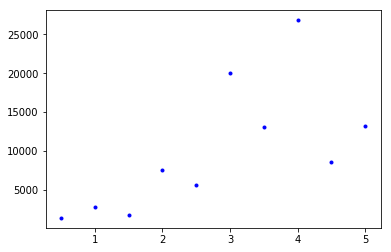

In [13]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print("Overall rating frequencies:\n", rating_frequencies)
# print("Overall rating frequencies:\n", rating_frequencies.sort_index())
plt.plot(rating_frequencies.index,
         rating_frequencies.values,
         'b.')
# plt.bar(rating_frequencies.index,
#         rating_frequencies.values,
#         )

In [14]:
(ratings_df['Year'] == 2018)

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: Year, Length: 100836, dtype: bool

In [15]:
# Find the slice that correspond to 2018 ratings
index_2018 = (ratings_df['Year'] == 2018)
# print(index_2018)

# Extract all 2018 ratings
ratings_2018 = ratings_df[index_2018]
ratings_2018.head()
print("Shape of the sub data frame:", ratings_2018.shape)
rating_freq_2018 = ratings_2018['rating'].value_counts()
print(rating_freq_2018.sort_index(ascending=False))

Shape of the sub data frame: (6413, 6)
5.0     763
4.5     770
4.0    1345
3.5     971
3.0     857
2.5     556
2.0     521
1.5     268
1.0     180
0.5     182
Name: rating, dtype: int64


Text(0,0.5,'Relative Frequency')

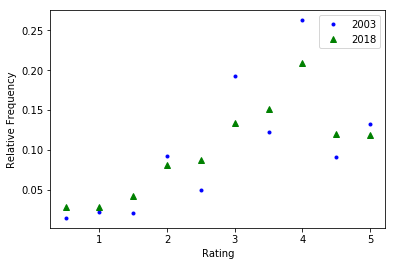

In [16]:
# What are the rating frequencies in 2003?
rating_freq_2003 = ratings_df[ratings_df['Year'] == 2003]['rating'].value_counts()

# Plot frequency comparison
plt.plot(rating_freq_2003 / np.sum(rating_freq_2003), 'b.', label="2003")
plt.plot(rating_freq_2018 / np.sum(rating_freq_2018), 'g^', label="2018")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")

**Conclusion:** The ratings distribution in 2003 is quite similar to the distribution in 2018. Most ratings are between 3.0 and 4.0.

### B. How consistant are the average ratings over time?
- Find a list of years during which ratings are given.
- For each year, extract the ratings given in that year, and then calculate the average rating
- Plot the average rating against the year number.

In [17]:
# Get the list of all years in the dataset
# set(ratings_df['Year'])
years = np.sort(ratings_df['Year'].unique())
print(years)

[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [18]:
# Calculate the average rating for each year
all_avg_ratings = []
for year in years:
    index_year = (ratings_df['Year'] == year)
    ratings_year = ratings_df[index_year]
    avg_rating = np.mean(ratings_year['rating'])
    all_avg_ratings.append(avg_rating)
print(all_avg_ratings)

[3.5359271523178806, 3.7275574112734864, 3.4358974358974357, 3.772447724477245, 3.39250571513766, 3.5122386537480876, 3.606958021851639, 3.4993771798704536, 3.506099420555047, 3.4315327713745054, 3.488060068931561, 3.3088876388693573, 3.6589714285714288, 3.3886066763425253, 3.4634941329856583, 3.7840236686390534, 3.6413230240549828, 3.8774038461538463, 3.5107713690062545, 3.513830108827086, 3.686334477099806, 3.3487748384737293, 3.3891314517386557]


(0, 5)

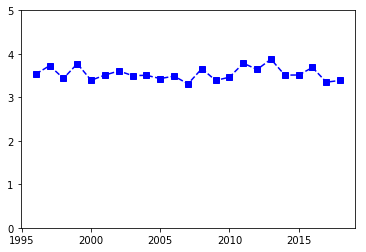

In [19]:
# Plot
plt.plot(years, all_avg_ratings, 'bs--')
plt.ylim([0, 5]) # set the upper and lower limits to the y-axis

**Conclusion:** No significant rating inflations

### C. How fast does the movie library grow?
- For each year, extract all ratings given **in that year or before**.
- Find the number of unique movies in the subset.
- Plot the number of movies against the year number

In [20]:
all_num_unique_movies = []
for year in years:
    index_ratings_year = (ratings_df['Year'] <= year)
    ratings_year = ratings_df[index_ratings_year] 
    num_unique_movies_year = len(np.unique(ratings_year['movieId'])) # OR
#     num_unique_movies_year = len(set(ratings_year['movieId']))
    all_num_unique_movies.append(num_unique_movies_year)
print(all_num_unique_movies)

[607, 859, 970, 1497, 2578, 3005, 3370, 3894, 4395, 4867, 5187, 5712, 5972, 6269, 6469, 6654, 6973, 7122, 7337, 7789, 8283, 8832, 9724]


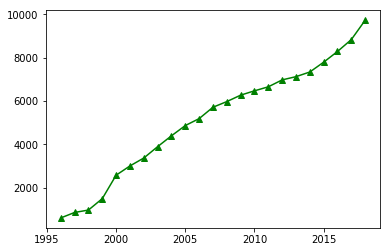

In [21]:
# plot number of movies vs. year number
plt.plot(years, all_num_unique_movies, 'g^-')

**Discussion:** How does the number of movies vary?

### D. How fast does the user base grow?
- For each year, extract all ratings given in that year or before.
- Find the number of unique users in the subset.
- Plot the number of users against the year number.

[97, 124, 133, 159, 207, 227, 241, 261, 272, 296, 319, 341, 363, 384, 399, 421, 446, 459, 467, 514, 546, 581, 610]


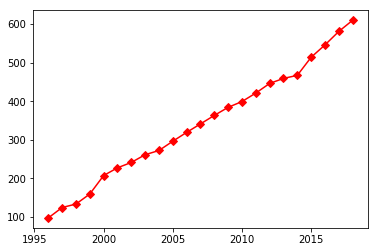

In [22]:
all_num_unique_users = []
for year in years:
    index_ratings_year = (ratings_df['Year'] <= year)
    ratings_year = ratings_df[index_ratings_year] 
    num_unique_users_year = len(np.unique(ratings_year['userId'])) # OR
#     num_unique_movies_year = len(set(ratings_year['movieId']))
    all_num_unique_users.append(num_unique_users_year)
print(all_num_unique_users)

plt.plot(years, all_num_unique_users, 'rD-')

**Discussion:** How does the user base grow?

### E. Time of ratings

In [23]:
# When was the first rating given?
ratings_df['DT'].min()

Timestamp('1996-03-29 13:36:55')

In [24]:
# When was the last rating given?
ratings_df['DT'].max()

Timestamp('2018-09-24 10:27:30')

(0, 24)

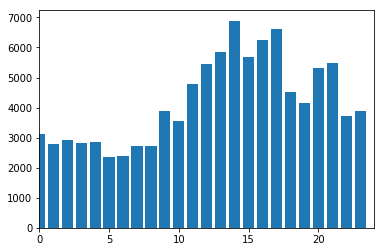

In [25]:
# During what time of day do most users give ratings?
# ratings_df['Hour'] = ratings_df['DT'].dt.hour
def extract_hour(x):
    return x.hour
ratings_df['Hour'] = ratings_df['DT'].apply(extract_hour)
hour_freq = ratings_df['Hour'].value_counts().sort_index()
plt.bar(hour_freq.index, hour_freq.values)
plt.xlim(0, 24)

**Conclusion:** Most ratings are given between 14:00 and 18:00. There are a significant number of ratings given late at night, possibly because the users live in a different time zone.

### F. Popular Movies

In [86]:
# Which movie received the highest number of ratings?

# 1. find the set of movie IDs

movieIds = list(set(ratings_df["movieId"]))
# movieIds = np.unique(ratings_df['movieId'])
# movieIds = ratings_df['movieId'].unique()
# print(movieIds)


# 2. find the number of ratings for each movie (a for loop through all movies is needed)
num_ratings = []
for movie in movieIds:
    index_movie = (ratings_df["movieId"] == movie)
    sub_df = ratings_df[index_movie]
    num_ratings.append(len(sub_df))
print(num_ratings)
# 3. find the movie ID that has the maximum number of ratings



[215, 110, 52, 7, 49, 102, 54, 8, 16, 132, 70, 19, 8, 18, 13, 82, 67, 20, 88, 15, 89, 36, 16, 28, 76, 13, 9, 11, 38, 1, 38, 177, 1, 128, 3, 67, 1, 4, 104, 2, 15, 1, 8, 46, 32, 15, 203, 68, 4, 204, 1, 28, 2, 3, 1, 1, 8, 37, 1, 34, 6, 80, 1, 5, 31, 9, 1, 5, 20, 55, 5, 7, 13, 8, 5, 15, 1, 3, 17, 2, 14, 8, 1, 7, 15, 7, 16, 10, 1, 8, 9, 10, 84, 1, 10, 1, 2, 14, 23, 5, 3, 99, 23, 1, 26, 1, 4, 237, 104, 46, 3, 1, 1, 5, 1, 2, 2, 2, 16, 4, 2, 12, 7, 1, 1, 5, 6, 31, 1, 1, 16, 86, 1, 12, 51, 3, 15, 7, 1, 201, 44, 1, 137, 12, 6, 3, 11, 62, 14, 57, 103, 17, 66, 14, 144, 1, 3, 54, 10, 35, 6, 53, 62, 10, 20, 13, 8, 1, 2, 36, 17, 2, 2, 112, 48, 4, 8, 1, 5, 6, 12, 35, 18, 10, 45, 2, 28, 4, 1, 1, 1, 22, 30, 9, 1, 21, 115, 3, 4, 2, 3, 6, 2, 24, 49, 6, 14, 1, 7, 1, 16, 104, 40, 52, 22, 3, 7, 24, 133, 14, 12, 17, 70, 45, 22, 44, 17, 4, 2, 5, 1, 1, 1, 29, 21, 17, 18, 6, 3, 43, 109, 1, 7, 35, 14, 10, 5, 251, 42, 21, 1, 33, 68, 17, 7, 2, 5, 4, 31, 28, 7, 6, 22, 38, 1, 2, 13, 14, 40, 5, 3, 2, 1, 1, 92, 8, 14, 

In [87]:
print(np.max(num_ratings)) # 329
idx = np.where(np.array(num_ratings) == 329)
print(idx)
movieId = movieIds[341]
print(movieId)

329
(array([341], dtype=int64),)
356


In [112]:
# Load the movies.csv file as a second data frame movies_df
movies_df = pd.read_csv("Data/ml-latest-small/movies.csv", delimiter=",")
movies_df.head()

# Find the name of the movie with highest number of ratings.
index = movies_df['movieId'] == 356
movies_df[index]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [95]:
# Which movie received the largest amount of 5.0?

# 1. extract the 5.0 ratings
index = (ratings_df['rating'] == 5.0)
ratings_5 = ratings_df[index]
ratings_5.head()
# ratings_t = ratings_df[ratings_df['rating'] == 5.0]

# 2. For each movieId, find the number of 5.0 ratings.
movieIds = set(ratings_df["movieId"])

all_numRatings = []

for Id in movieIds:
    index = (ratings_5['movieId'] == Id)
    ratings_5_id = ratings_5[index]  # gives the subset of 5.0 ratings to this movie
    numRatings = len(ratings_5_id)
    all_numRatings.append(numRatings)
print(all_numRatings)


[47, 7, 6, 0, 3, 24, 2, 1, 2, 10, 11, 1, 0, 3, 1, 14, 19, 4, 3, 0, 9, 3, 2, 3, 17, 0, 2, 3, 8, 1, 2, 45, 0, 27, 0, 13, 0, 0, 10, 1, 1, 0, 0, 1, 3, 1, 52, 4, 0, 71, 0, 3, 2, 0, 0, 0, 1, 12, 0, 3, 1, 20, 0, 0, 1, 0, 1, 1, 4, 6, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 1, 4, 0, 4, 4, 0, 2, 0, 1, 0, 0, 1, 6, 0, 1, 0, 2, 0, 5, 1, 0, 14, 1, 0, 3, 0, 1, 80, 32, 8, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 7, 0, 0, 2, 0, 1, 0, 1, 45, 7, 0, 7, 1, 0, 0, 1, 3, 0, 3, 14, 5, 11, 1, 23, 1, 0, 8, 0, 3, 2, 2, 2, 2, 4, 4, 0, 0, 0, 1, 0, 0, 0, 8, 2, 1, 4, 0, 1, 1, 2, 1, 6, 1, 0, 0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 4, 2, 0, 0, 0, 0, 3, 0, 7, 7, 1, 2, 0, 0, 0, 4, 23, 4, 6, 1, 0, 1, 2, 14, 5, 0, 0, 9, 6, 2, 1, 0, 0, 1, 0, 0, 0, 0, 13, 4, 2, 3, 0, 0, 4, 10, 0, 1, 2, 3, 0, 0, 104, 8, 2, 0, 13, 7, 2, 0, 0, 1, 1, 9, 2, 0, 0, 2, 5, 0, 0, 5, 3, 4, 0, 1, 0, 0, 0, 12, 2, 5, 0, 10, 35, 0, 0, 123, 0, 2, 9, 0, 0, 1, 1, 1, 6, 5, 5, 0, 0, 0, 0, 0, 3, 2, 11, 7, 153, 5, 0, 0, 2, 1, 0, 1, 1, 1, 1, 8, 0, 0, 1, 14, 2, 0

In [106]:
# Find the name of the movie
# Solution 1:
maxRatings = np.max(all_numRatings)
print(maxRatings)
# idx = np.where(np.array(all_numRatings) == 153)
idx = all_numRatings.index(maxRatings)
print(idx)
movieId = list(movieIds)[idx] # need to convert from set to list
print(movieId)

index = movies_df['movieId'] == 318
movies_df[index]

153
303
318


,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [113]:
# Solution 2: use argsort to find the index directly
idx = np.argsort(all_numRatings)[-1]
print(idx)
movieId = list(movieIds)[idx]
print(movieId)
index = movies_df['movieId'] == movieId
movies_df[index]

303
318


,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [30]:
# Which five movie has the highest average rating?


# Find the name of the movies


# How many ratings do these movies receive?




## 3. Working with multiple data frames

In [119]:
movies_df = pd.read_csv("Data/ml-latest-small/movies.csv", delimiter=",")
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [121]:
# Create a "AvgRating" column: for each movie, fill in its average rating

# Example: Find the average rating for the first movie
movieId = movies_df.loc[0, 'movieId']
print(movieId)
index = (ratings_df['movieId'] == movieId)
ratings_movie = ratings_df[index]
ratings_movie.head()
avgRating = np.mean(ratings_movie['rating'])
print(avgRating)
movies_df.loc[0, 'avgRating'] = avgRating # = findAvgRating(0)
movies_df.head()

1
3.9209302325581397


,movieId,title,genres,avgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [126]:
# Define a function findAvgRating(int) to calculate the average
# rating for a particular row index
def findAvgRating(idx):
    movieId = movies_df.loc[idx, 'movieId']
    index = (ratings_df['movieId'] == movieId)
    ratings_movie = ratings_df[index]
    avgRating = np.mean(ratings_movie['rating'])
    return avgRating
    
# movies_df.loc[1, 'avgRating'] = findAvgRating(1)
# movies_df.loc[2, 'avgRating'] = findAvgRating(2)
movies_df['avgRating'] = pd.Series(movies_df.index).apply(findAvgRating)
movies_df.head()

,movieId,title,genres,avgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [129]:
# Sort the data frame by 'avgRating'
movies_df.sort_values(by=['avgRating'], inplace=True, ascending=False)
movies_df.head(20)

,movieId,title,genres,avgRating
6499,53355,Sun Alley (Sonnenallee) (1999),Comedy|Romance,5.0
4768,7096,Rivers and Tides (2001),Documentary,5.0
5878,33138,Palindromes (2004),Adventure|Comedy|Drama,5.0
8752,128087,Trinity and Sartana Are Coming (1972),Comedy|Western,5.0
2880,3851,I'm the One That I Want (2000),Comedy,5.0
9337,160644,Indignation (2016),Drama,5.0
8726,126921,The Fox and the Hound 2 (2006),Adventure|Animation|Children|Comedy,5.0
2936,3939,Slumber Party Massacre II (1987),Horror,5.0
2937,3940,Slumber Party Massacre III (1990),Horror,5.0
2938,3941,Sorority House Massacre (1986),Horror,5.0


In [131]:
# Create a "NumRatings" column: for each movie, fill in the number ratings
def findNumRatings(movieId):
    index = (ratings_df['movieId'] == movieId)
    ratings_movie = ratings_df[index]
    numRatings = len(ratings_movie)
    return numRatings

movies_df['numRatings'] = movies_df['movieId'].apply(findNumRatings)
movies_df.head(25)

,movieId,title,genres,avgRating,numRatings
6499,53355,Sun Alley (Sonnenallee) (1999),Comedy|Romance,5.0,1
4768,7096,Rivers and Tides (2001),Documentary,5.0,1
5878,33138,Palindromes (2004),Adventure|Comedy|Drama,5.0,1
8752,128087,Trinity and Sartana Are Coming (1972),Comedy|Western,5.0,1
2880,3851,I'm the One That I Want (2000),Comedy,5.0,1
9337,160644,Indignation (2016),Drama,5.0,1
8726,126921,The Fox and the Hound 2 (2006),Adventure|Animation|Children|Comedy,5.0,1
2936,3939,Slumber Party Massacre II (1987),Horror,5.0,1
2937,3940,Slumber Party Massacre III (1990),Horror,5.0,1
2938,3941,Sorority House Massacre (1986),Horror,5.0,1


In [132]:
# Extract movies with ratings >= 100
movies_with_many_ratings = movies_df[movies_df['numRatings'] >= 100]
movies_with_many_ratings.head(10)

,movieId,title,genres,avgRating,numRatings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126
694,912,Casablanca (1942),Drama|Romance,4.240000,100
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255,149
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394,142


In [35]:
# Use .sort_values() to sort the data frame according to the AvgRating column


In [134]:
# Use sort_values() again to find the movies with largest number of ratings
movies_with_many_ratings.sort_values(by=['numRatings'],
                                     ascending=False,
                                     inplace=True)
movies_with_many_ratings.head(20)

C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,movieId,title,genres,avgRating,numRatings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238
97,110,Braveheart (1995),Action|Drama|War,4.031646,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224
461,527,Schindler's List (1993),Drama|War,4.225000,220


In [141]:
# Extract the comedy movies

def isComedy(genres):
    """
    Return True if comedy is one of its genres
    """
    return ("Comedy" in genres)

movies_with_many_ratings['isComedy'] = \
    movies_with_many_ratings['genres'].apply(isComedy)
movies_with_many_ratings.head()

movies_comedy = movies_with_many_ratings[
    movies_with_many_ratings['isComedy']
]
movies_comedy.sort_values(by=['avgRating'], ascending=False, inplace=True)
movies_comedy.head(10)

C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,movieId,title,genres,avgRating,numRatings,isComedy
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394,142,True
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307,True
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.183333,120,True
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329,True
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.161765,136,True
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.116022,181,True
613,778,Trainspotting (1996),Comedy|Crime|Drama,4.039216,102,True
969,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,4.038012,171,True
4360,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,3.960993,141,True
964,1265,Groundhog Day (1993),Comedy|Fantasy|Romance,3.944056,143,True


In [143]:
def isComedy(genres):
    """
    Return True if comedy is one of its genres
    """
    return ("Drama" in genres)

movies_with_many_ratings['isComedy'] = \
    movies_with_many_ratings['genres'].apply(isComedy)
movies_with_many_ratings.head()

movies_comedy = movies_with_many_ratings[
    movies_with_many_ratings['isComedy']
]
movies_comedy.sort_values(by=['avgRating'], ascending=False, inplace=True)
movies_comedy.head(10)

C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,movieId,title,genres,avgRating,numRatings,isComedy
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317,True
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192,True
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218,True
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129,True
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107,True
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126,True
694,912,Casablanca (1942),Drama|Romance,4.240000,100,True
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255,149,True
461,527,Schindler's List (1993),Drama|War,4.225000,220,True
909,1208,Apocalypse Now (1979),Action|Drama|War,4.219626,107,True


In [37]:
# Find the 5 top-rated comedies


In [38]:
# Load tags.csv


In [39]:
# For Movie #1: Toy Story, find all tags related to it.


In [40]:
# Create a string that contains all the tags for Toy Story, separated by '|'


In [41]:
# Create a "Tags" column in the movies dataframe, fill in the string that contains 
# each movie's tags



In [42]:
# Which movies have a dark hero?



In [ ]:
Number of ratings is not calculated.

# Homework (Due on Wednesday, Oct 2)

Create a new Jupyter notebook, load `ratings.csv` and `movies.csv` as dataframes.

1. Create column "AvgRating50" in the movies dataframe. For each movie, if there are less than 50 ratings, set its AvgRating50 value to -1.0; otherwise, set the value to the average rating.
2. Print the complete list of genres. (Use [`split()` method](https://www.geeksforgeeks.org/python-string-split/)
to split a string containing multiple genres)
3. Which genre has the largest number of movies?
4. For each genre, find the ID of the movie with highest AvgRating50 value.
5. For each genre, find the name of the movie with the highest AvgRating50 value.


In [76]:
import pandas as pd

In [77]:
homeworks = pd.DataFrame({
    'Name': ['Alex', 'Alex', 'Alex', 'Brian', 'Brian', 'Brian', 'Cyd', 'Cyd', 'Cyd'],
    'Week': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'Grade': [1.2, 2.3, 3.5, 5.7, 7.8,5.3, 6.4, 7.4, 9.2]
})

In [78]:
homeworks

,Grade,Name,Week
0,1.2,Alex,1
1,2.3,Alex,2
2,3.5,Alex,3
3,5.7,Brian,1
4,7.8,Brian,2
5,5.3,Brian,3
6,6.4,Cyd,1
7,7.4,Cyd,2
8,9.2,Cyd,3


In [79]:
# Question: What is the average score for Week 1?

# Extract grades from Week 1
index = (homeworks['Week'] == 1)
index

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: Week, dtype: bool

In [80]:
# Use the boolean indices to extract the grades
week1_hw = homeworks[index]
week1_hw

,Grade,Name,Week
0,1.2,Alex,1
3,5.7,Brian,1
6,6.4,Cyd,1


In [81]:
# Calculate the average grade:
np.mean(week1_hw['Grade'])

4.433333333333334